In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

<hr>

# Reading Data

In [3]:
reviews_file_path = 'data/reviews_Cell_Phones_and_Accessories_5.csv'

In [4]:
reviews = pd.read_csv(reviews_file_path, sep='\t')

In [5]:
reviews.head()

,reviewerID,asin,overall,numberOfPositiveFeedback,numberOfNegativeFeedback,reviewText,summary
0,A30TL5EWN6DFXT,120401325X,4.0,0,0,They look good and stick good! I just don't li...,Looks Good
1,ASY55RVNIL0UD,120401325X,5.0,0,0,These stickers work like the review says they ...,Really great product.
2,A2TMXE2AFO7ONB,120401325X,5.0,0,0,These are awesome and make my phone look so st...,LOVE LOVE LOVE
3,AWJ0WZQYMYFQ4,120401325X,4.0,4,4,Item arrived in great time and was in perfect ...,Cute!
4,ATX7CZYFXI1KW,120401325X,5.0,2,3,"awesome! stays on, and looks great. can be use...",leopard home button sticker for iphone 4s


In [6]:
print("Columns :: ", *reviews.columns, sep='\n')

Columns :: 
reviewerID
asin
overall
numberOfPositiveFeedback
numberOfNegativeFeedback
reviewText
summary


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194425 entries, 0 to 194424
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   reviewerID                194425 non-null  object 
 1   asin                      194425 non-null  object 
 2   overall                   194425 non-null  float64
 3   numberOfPositiveFeedback  194425 non-null  int64  
 4   numberOfNegativeFeedback  194425 non-null  int64  
 5   reviewText                194326 non-null  object 
 6   summary                   194424 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 10.4+ MB


In [8]:
reviews.describe()

,overall,numberOfPositiveFeedback,numberOfNegativeFeedback
count,194425.000000,194425.00000,194425.000000
mean,4.129886,1.43784,1.737163
std,1.222502,15.85819,16.801478
min,1.000000,0.00000,0.000000
25%,4.000000,0.00000,0.000000
50%,5.000000,0.00000,0.000000
75%,5.000000,0.00000,1.000000
max,5.000000,1984.00000,2031.000000


## Basic Feature-Engineering

In [9]:
# combining reviews and summary
reviews['review_text'] = reviews.apply(lambda x : str(x['reviewText']) + " " + str(x['summary']), axis=1)

# calculate helpfulness ratio
reviews['help_ratio'] = reviews.apply(lambda x : x['numberOfPositiveFeedback'] / (x['numberOfPositiveFeedback'] + x['numberOfNegativeFeedback'] + 0.00001), axis=1)

# calculate unhelpfulness ratio
reviews['unhelp_ratio'] = reviews.apply(lambda x : x['numberOfNegativeFeedback'] / (x['numberOfPositiveFeedback'] + x['numberOfNegativeFeedback'] + 0.00001), axis=1)

# calculate rating class
reviews['rating_class'] = reviews.apply(lambda x : 1 if x['overall'] >= 3 else 0, axis=1)

reviews.drop(columns=['reviewText', 'summary'], inplace=True)

In [10]:
reviews.head()

,reviewerID,asin,overall,numberOfPositiveFeedback,numberOfNegativeFeedback,review_text,help_ratio,unhelp_ratio,rating_class
0,A30TL5EWN6DFXT,120401325X,4.0,0,0,They look good and stick good! I just don't li...,0.000000,0.000000,1
1,ASY55RVNIL0UD,120401325X,5.0,0,0,These stickers work like the review says they ...,0.000000,0.000000,1
2,A2TMXE2AFO7ONB,120401325X,5.0,0,0,These are awesome and make my phone look so st...,0.000000,0.000000,1
3,AWJ0WZQYMYFQ4,120401325X,4.0,4,4,Item arrived in great time and was in perfect ...,0.499999,0.499999,1
4,ATX7CZYFXI1KW,120401325X,5.0,2,3,"awesome! stays on, and looks great. can be use...",0.399999,0.599999,1


In [11]:
print("Columns :: ", *reviews.columns, sep='\n')

Columns :: 
reviewerID
asin
overall
numberOfPositiveFeedback
numberOfNegativeFeedback
review_text
help_ratio
unhelp_ratio
rating_class


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194425 entries, 0 to 194424
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   reviewerID                194425 non-null  object 
 1   asin                      194425 non-null  object 
 2   overall                   194425 non-null  float64
 3   numberOfPositiveFeedback  194425 non-null  int64  
 4   numberOfNegativeFeedback  194425 non-null  int64  
 5   review_text               194425 non-null  object 
 6   help_ratio                194425 non-null  float64
 7   unhelp_ratio              194425 non-null  float64
 8   rating_class              194425 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 13.4+ MB


In [13]:
reviews.describe()

,overall,numberOfPositiveFeedback,numberOfNegativeFeedback,help_ratio,unhelp_ratio,rating_class
count,194425.000000,194425.00000,194425.000000,194425.000000,194425.000000,194425.000000
mean,4.129886,1.43784,1.737163,0.101932,0.171324,0.874800
std,1.222502,15.85819,16.801478,0.192685,0.295902,0.330946
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.00000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,0.00000,1.000000,0.000000,0.499998,1.000000
max,5.000000,1984.00000,2031.000000,0.500000,1.000000,1.000000


In [14]:
print("Have any `null` values ::", reviews.isnull().values.any())

Have any `null` values :: False


### No nan values

## Descriptive Statistics

In [38]:
print("Number of reviews ::", len(reviews))
print("Number of unique reviewers ::", len(reviews['reviewerID'].unique()), '/', len(reviews))
print('Number of unique products::', len(reviews['asin'].unique()), '/', len(reviews))
print("Number of positive feedback ::", reviews['numberOfPositiveFeedback'].sum())
print("Number of negative feedback ::", reviews['numberOfNegativeFeedback'].sum())
print("Average helpful ratio-score ::", reviews['help_ratio'].mean())
print("Average helpful > 0 ratio score ::", reviews.loc[reviews['help_ratio']>0, 'help_ratio'].mean(), '/', len(reviews.loc[reviews['help_ratio']>0, 'help_ratio']))
print("Average unhelpful ratio-score ::", reviews['unhelp_ratio'].mean())
print("Average unhelpful > 0 ratio score ::", reviews.loc[reviews['unhelp_ratio']>0, 'unhelp_ratio'].mean(), '/', len(reviews.loc[reviews['unhelp_ratio']>0, 'unhelp_ratio']))
print("Number of good ratings ::", reviews['rating_class'].sum())
print("Number of bad ratings ::", len(reviews) - reviews['rating_class'].sum())
print("Average rating score ::", reviews['overall'].mean())

Number of reviews :: 194425
Number of unique reviewers :: 27879 / 194425
Number of unique products:: 10429 / 194425
Number of positive feedback :: 279552
Number of negative feedback :: 337748
Average helpful ratio-score :: 0.10193162769489607
Average helpful > 0 ratio score :: 0.45413636230390636 / 43639
Average unhelpful ratio-score :: 0.17132430066837556
Average unhelpful > 0 ratio score :: 0.6269712234123046 / 53128
Number of good ratings :: 170083
Number of bad ratings :: 24342
Average rating score :: 4.12988555998457


In [32]:
reviews.loc[reviews['help_ratio']>0, 'help_ratio'].mean()

0.45413636230390636

In [36]:
reviews.loc[reviews['unhelp_ratio']>0, 'unhelp_ratio'].mean()

0.6269712234123046

In [16]:
reviews['help_ratio'].max(), reviews['unhelp_ratio'].max()

(0.49999998376623433, 0.9999999173553787)

In [17]:
#-of-reviews-with-num-positive-feedback-ge-negative-feedback
reviews.apply(lambda x : x['numberOfPositiveFeedback'] > x['numberOfNegativeFeedback'], axis=1).sum()

0

### From above we can notice as `helpfulness-ratio` is `max 0.5` implying `numberOfPositiveFeedback <= numberOfNegativeFeedback`, with `avg 0.454` for reviews with `help_ratio > 0`, implying most of the reviews were unhelpful

## Saving processed data

In [26]:
reviews.to_csv('data/reviews_processed.csv', sep='\t', index=None)

<hr>

# EDA

In [2]:
reviews = pd.read_csv('data/reviews_processed.csv', sep='\t')

In [3]:
reviews.head()

,reviewerID,asin,overall,numberOfPositiveFeedback,numberOfNegativeFeedback,review_text,help_ratio,unhelp_ratio,rating_class
0,A30TL5EWN6DFXT,120401325X,4.0,0,0,They look good and stick good! I just don't li...,0.000000,0.000000,1
1,ASY55RVNIL0UD,120401325X,5.0,0,0,These stickers work like the review says they ...,0.000000,0.000000,1
2,A2TMXE2AFO7ONB,120401325X,5.0,0,0,These are awesome and make my phone look so st...,0.000000,0.000000,1
3,AWJ0WZQYMYFQ4,120401325X,4.0,4,4,Item arrived in great time and was in perfect ...,0.499999,0.499999,1
4,ATX7CZYFXI1KW,120401325X,5.0,2,3,"awesome! stays on, and looks great. can be use...",0.399999,0.599999,1


In [4]:
reviews.describe()

,overall,numberOfPositiveFeedback,numberOfNegativeFeedback,help_ratio,unhelp_ratio,rating_class
count,194425.000000,194425.00000,194425.000000,194425.000000,194425.000000,194425.000000
mean,4.129886,1.43784,1.737163,0.101932,0.171324,0.874800
std,1.222502,15.85819,16.801478,0.192685,0.295902,0.330946
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.00000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,0.00000,1.000000,0.000000,0.499998,1.000000
max,5.000000,1984.00000,2031.000000,0.500000,1.000000,1.000000


In [2]:
def cnt_plot_categorical_data(data, fig_title, column_x=None, column_y=None, hue=None, figsize=None,
                              sort_by_column_unique_values=False, rotation=0, annotate_verbose=1, h_d=0, v_d=0):
    if figsize is None:
        figsize = (10, 10)
    fig = plt.figure(figsize=figsize)
    fig.suptitle(fig_title)
    
    # one out of column_x and column_y needs to be None
    if not (column_x is None)^(column_y is None):
        raise ValueError("One of either `column_x` and `column_y` must be None")
    
    column = column_x if column_x is not None else column_y
    
    if sort_by_column_unique_values:
        ax = sns.countplot(x=column_x, y=column_y, hue=hue, data=data, order=sorted(data[column].unique()))
        ax.set_xticklabels(labels=sorted(data[column].unique()), rotation=rotation)
    else:
        ax = sns.countplot(x=column_x, y=column_y, hue=hue, data=data, order=data[column].value_counts().index)
        ax.set_xticklabels(labels=data[column].value_counts().index, rotation=rotation)
    
    if annotate_verbose > 0:
        total = len(data)
        for p in ax.patches:
            if annotate_verbose == 1:
                ax.annotate('({}/{:d}),{:.2f}%'.format(p.get_height(), int(total), p.get_height()*100/total), (p.get_x()+h_d, p.get_height()+v_d))
            elif annotate_verbose == 2:
                ax.annotate('({}/{:d})'.format(p.get_height(), int(total)), (p.get_x()+h_d, p.get_height()+v_d))
            else:
                ax.annotate('{:.2f}%'.format(p.get_height()*100/total), (p.get_x()+h_d, p.get_height()+v_d))

In [3]:
def bar_plot_categorical_data(data, fig_title, column_x, column_y, hue=None, figsize=None, rotation=0,
                              precision=2, annotate_verbose=1, h_d=0, v_d=0):
    if figsize is None:
        figsize = (10, 10)
    fig = plt.figure(figsize=figsize)
    fig.suptitle(fig_title)
    
    ax = sns.barplot(x=column_x, y=column_y, hue=hue, data=data)
    for item in ax.get_xticklabels():
        item.set_rotation(rotation)

    def truncate(number, decimals=0):
        """
        Returns a value truncated to a specific number of decimal places.
        """
        if not isinstance(decimals, int):
            raise TypeError("decimal places must be an integer.")
        elif decimals < 0:
            raise ValueError("decimal places has to be 0 or more.")
        elif decimals == 0:
            return math.trunc(number)

        factor = 10.0 ** decimals
        return math.trunc(number * factor) / factor
    
    if annotate_verbose > 0:
        for p in ax.patches:
            try:
                ax.annotate(str(truncate(p.get_height(), precision)), (p.get_x()+h_d, p.get_height()+v_d))
            except Exception:
                pass

### Filtering on the basis of combined review lengths for each product

In [7]:
data = reviews[['asin', 'overall', 'help_ratio', 'unhelp_ratio', 'review_text']]
data.loc[:, 'len_review'] = data.apply(lambda x : len(x['review_text']), axis=1).values

/home/akash/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/akash/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:xlabel='overall', ylabel='len_review'>

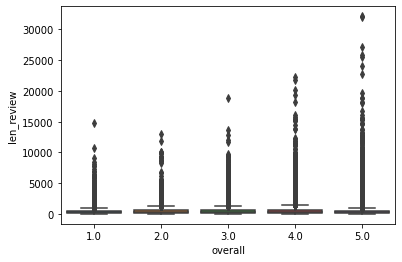

In [8]:
# rating vs review-length
sns.boxplot(x='overall', y='len_review', data=data)

<AxesSubplot:xlabel='len_review', ylabel='Density'>

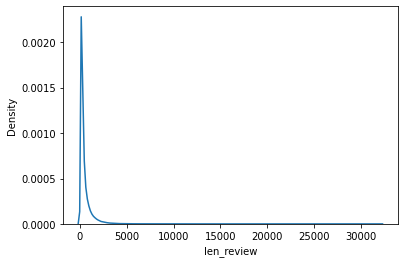

In [9]:
# distribution of review length
sns.kdeplot(x='len_review', data=data)

In [10]:
# distribution of review length for each product
plot_data = data.groupby(by='asin').apply(lambda x : len(' '.join(x['review_text'].values.tolist())))

In [11]:
plot_data = plot_data.to_frame(name='cnt')
plot_data = plot_data.reset_index(drop=False)

<AxesSubplot:xlabel='cnt', ylabel='Density'>

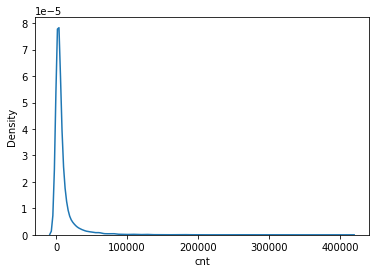

In [12]:
# distribution of combined review length for each product
sns.kdeplot(x='cnt', data=plot_data)

<AxesSubplot:xlabel='cnt', ylabel='Density'>

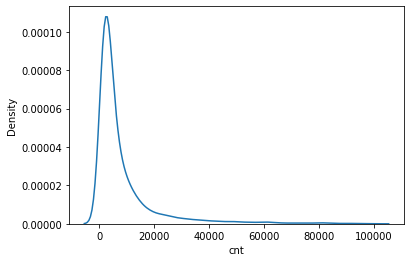

In [13]:
# distribution of combined review length for each product
sns.kdeplot(x='cnt', data=plot_data[plot_data['cnt']<100000])

<AxesSubplot:xlabel='cnt', ylabel='Density'>

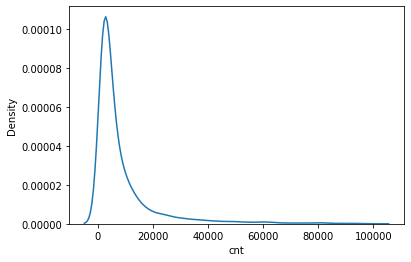

In [14]:
# distribution of combined review length for each product
sns.kdeplot(x='cnt', data=plot_data.loc[(plot_data['cnt']>1000) & (plot_data['cnt']<100000)])

In [15]:
plot_data['cnt'].min()

377

In [16]:
assert(plot_data.shape[0] == plot_data['asin'].unique().shape[0])

### Only keeping products with combined reviews length `1000 < L < 100000`

In [17]:
relevant_product_ids = plot_data.loc[(plot_data['cnt']>1000) & (plot_data['cnt']<100000), 'asin'].values

In [18]:
relevant_product_ids.shape

(9944,)

In [19]:
reviews.shape

(194425, 9)

In [20]:
filtered_reviews = reviews[reviews['asin'].isin(relevant_product_ids)]

In [21]:
filtered_reviews.shape

(171167, 9)

In [22]:
filtered_reviews.head()

,reviewerID,asin,overall,numberOfPositiveFeedback,numberOfNegativeFeedback,review_text,help_ratio,unhelp_ratio,rating_class
0,A30TL5EWN6DFXT,120401325X,4.0,0,0,They look good and stick good! I just don't li...,0.000000,0.000000,1
1,ASY55RVNIL0UD,120401325X,5.0,0,0,These stickers work like the review says they ...,0.000000,0.000000,1
2,A2TMXE2AFO7ONB,120401325X,5.0,0,0,These are awesome and make my phone look so st...,0.000000,0.000000,1
3,AWJ0WZQYMYFQ4,120401325X,4.0,4,4,Item arrived in great time and was in perfect ...,0.499999,0.499999,1
4,ATX7CZYFXI1KW,120401325X,5.0,2,3,"awesome! stays on, and looks great. can be use...",0.399999,0.599999,1


In [23]:
filtered_reviews['asin'].unique().shape

(9944,)

## Saving filtered data

In [24]:
filtered_reviews.to_csv('data/filtered_reviews.csv', sep='\t', index=None)

## Reading filtered data

In [4]:
filtered_reviews = pd.read_csv('data/filtered_reviews.csv', sep='\t')

In [5]:
filtered_reviews.head()

,reviewerID,asin,overall,numberOfPositiveFeedback,numberOfNegativeFeedback,review_text,help_ratio,unhelp_ratio,rating_class
0,A30TL5EWN6DFXT,120401325X,4.0,0,0,They look good and stick good! I just don't li...,0.000000,0.000000,1
1,ASY55RVNIL0UD,120401325X,5.0,0,0,These stickers work like the review says they ...,0.000000,0.000000,1
2,A2TMXE2AFO7ONB,120401325X,5.0,0,0,These are awesome and make my phone look so st...,0.000000,0.000000,1
3,AWJ0WZQYMYFQ4,120401325X,4.0,4,4,Item arrived in great time and was in perfect ...,0.499999,0.499999,1
4,ATX7CZYFXI1KW,120401325X,5.0,2,3,"awesome! stays on, and looks great. can be use...",0.399999,0.599999,1


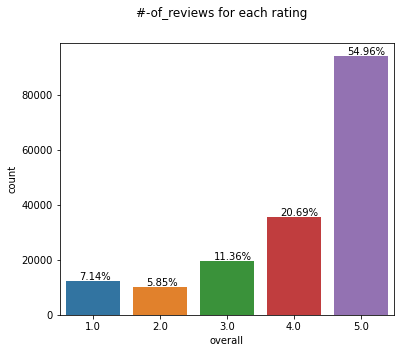

In [6]:
# #-of_reviews for each rating
cnt_plot_categorical_data(filtered_reviews, "#-of_reviews for each rating", column_x='overall', figsize=(6, 5),
                          sort_by_column_unique_values=True, annotate_verbose=3, h_d=0.2, v_d=500)

### More than `50% people` give `5.0 rating` and less than `13% people` give less than `3.0 rating (bad)`

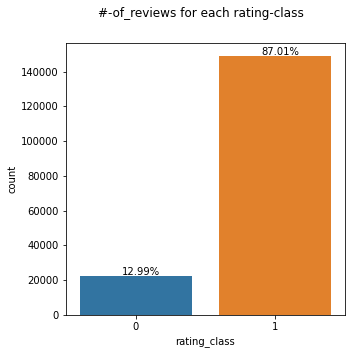

In [7]:
# #-of_reviews for each rating-class
cnt_plot_categorical_data(filtered_reviews, "#-of_reviews for each rating-class", column_x='rating_class', figsize=(5, 5),
                          sort_by_column_unique_values=True, annotate_verbose=3, h_d=0.3, v_d=500)

In [8]:
reviews_with_feedback = filtered_reviews.loc[((filtered_reviews['numberOfPositiveFeedback']>0) | (filtered_reviews['numberOfNegativeFeedback']>0))]

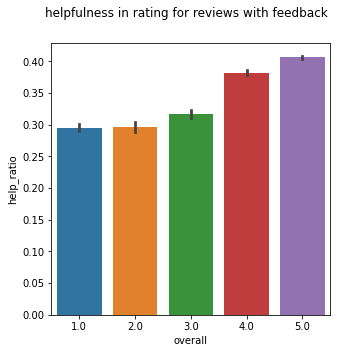

In [9]:
# helpfulness in rating for reviews with feedback
bar_plot_categorical_data(reviews_with_feedback, fig_title="helpfulness in rating for reviews with feedback",
                          column_x='overall', column_y='help_ratio', figsize=(5, 5), precision=2)

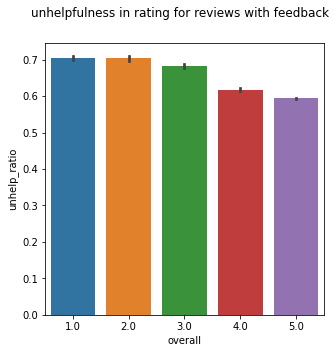

In [10]:
# unhelpfulness in rating for reviews with feedback
bar_plot_categorical_data(reviews_with_feedback, fig_title="unhelpfulness in rating for reviews with feedback",
                          column_x='overall', column_y='unhelp_ratio', figsize=(5, 5), precision=2)

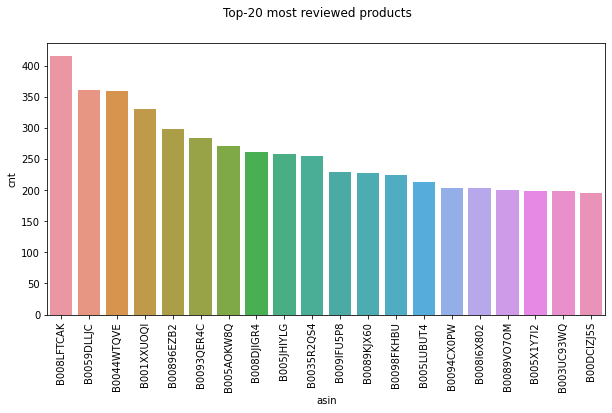

In [11]:
# Top-20 most reviewed products
data = filtered_reviews.groupby(by='asin').apply(lambda x : len(x)).sort_values(ascending=False).iloc[:20]
data = data.to_frame(name='cnt')
data = data.reset_index(drop=False)

bar_plot_categorical_data(data, fig_title="Top-20 most reviewed products", column_x='asin', column_y='cnt',
                          figsize=(10, 5), rotation=90, precision=3)

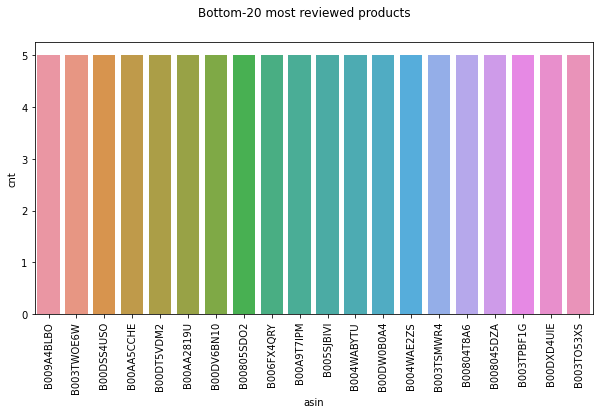

In [12]:
# Bottom-20 most reviewed products
data = filtered_reviews.groupby(by='asin').apply(lambda x : len(x)).sort_values(ascending=True).iloc[:20]
data = data.to_frame(name='cnt')
data = data.reset_index(drop=False)

bar_plot_categorical_data(data, fig_title="Bottom-20 most reviewed products", column_x='asin', column_y='cnt',
                          figsize=(10, 5), rotation=90, precision=3)

### Wordcloud

In [13]:
import wordcloud

In [14]:
good_reviews = filtered_reviews[filtered_reviews['rating_class']==1]
bad_reviews = filtered_reviews[filtered_reviews['rating_class']==0]

(-0.5, 399.5, 199.5, -0.5)

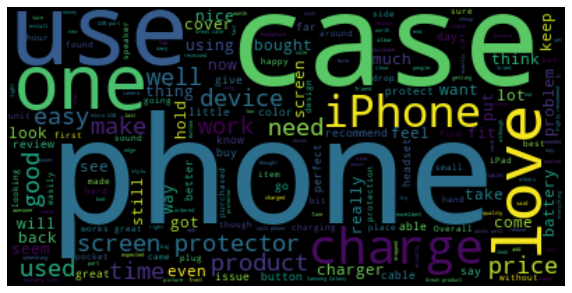

In [17]:
# wordcloud for good ratings
text = ' '.join(good_reviews['review_text'].values.tolist())
wc = wordcloud.WordCloud().generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

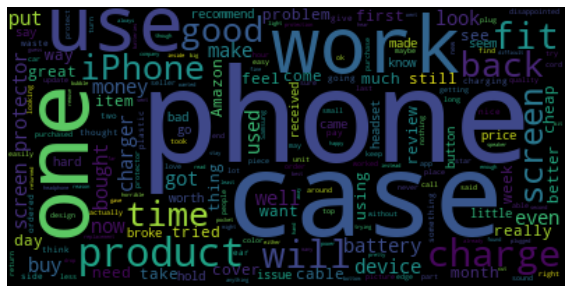

In [18]:
# wordcloud for bad ratings
text = ' '.join(bad_reviews['review_text'].values.tolist())
wc = wordcloud.WordCloud().generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")